## 题目分析

是一个预测问题，还是一个分类问题

## 导入数据

In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
DATA_FILENAME = './2hours.csv'
acc_all = pd.read_csv(DATA_FILENAME)
acc_labels = acc_all['accident num']
acc = acc_all.copy()
acc.drop(['accident num'],axis=1,inplace=True)

## 数据概览和可视化

In [3]:
acc.describe()

,holiday,precipitation,visibility,wind,wind direction,fog,rain,sun rise,sun set
count,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000,17532.000000
mean,0.064339,0.007716,9.574015,10.066454,151.800935,0.039813,0.115902,0.087212,0.089893
std,0.245364,0.119345,1.606654,5.253421,99.283448,0.195525,0.422979,0.282153,0.286036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,10.000000,5.750000,80.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,10.000000,10.360000,130.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,10.000000,13.800000,210.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,5.000000,10.000000,36.820000,360.000000,1.000000,3.000000,1.000000,1.000000


In [4]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17532 entries, 0 to 17531
Data columns (total 11 columns):
Time              17532 non-null object
accident type     17532 non-null object
holiday           17532 non-null int64
precipitation     17532 non-null float64
visibility        17532 non-null float64
wind              17532 non-null float64
wind direction    17532 non-null int64
fog               17532 non-null int64
rain              17532 non-null int64
sun rise          17532 non-null int64
sun set           17532 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 1.5+ MB


In [5]:
cat_attributes = acc.columns[[1]]
time_attributes = acc.columns[[0]]
num_attributes = acc.columns.delete([0,1])
print(cat_attributes)
print(time_attributes)
print(num_attributes)

Index(['accident type'], dtype='object')
Index(['Time'], dtype='object')
Index(['holiday', 'precipitation', 'visibility', 'wind', 'wind direction',
       'fog', 'rain', 'sun rise', 'sun set'],
      dtype='object')


需要属性数值化的列：
- Time
- accident type

In [6]:
acc.head()

,Time,accident type,holiday,precipitation,visibility,wind,wind direction,fog,rain,sun rise,sun set
0,1/1/2011 0:00,A1,1,0.0,10.0,16.11,130,0,0,0,0
1,1/1/2011 2:00,NONE,1,0.0,10.0,10.36,130,0,0,0,0
2,1/1/2011 4:00,NONE,1,0.0,10.0,13.80,130,0,0,0,0
3,1/1/2011 6:00,NONE,1,0.0,10.0,16.11,130,0,0,1,0
4,1/1/2011 8:00,NONE,1,0.0,10.0,16.11,140,0,0,0,0


In [7]:
acc.columns

Index(['Time', 'accident type', 'holiday', 'precipitation', 'visibility',
       'wind', 'wind direction', 'fog', 'rain', 'sun rise', 'sun set'],
      dtype='object')

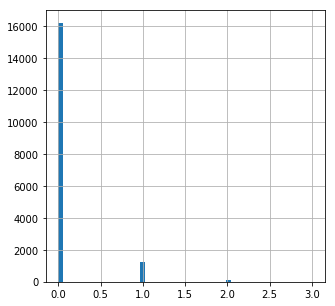

In [8]:
acc_labels.describe()
acc_labels.hist(bins=50, figsize=(5,5))
plt.show()

In [9]:
acc['accident type'].value_counts()

NONE    16219
A1       1313
Name: accident type, dtype: int64

In [10]:
acc['Time'].head()

0    1/1/2011 0:00
1    1/1/2011 2:00
2    1/1/2011 4:00
3    1/1/2011 6:00
4    1/1/2011 8:00
Name: Time, dtype: object

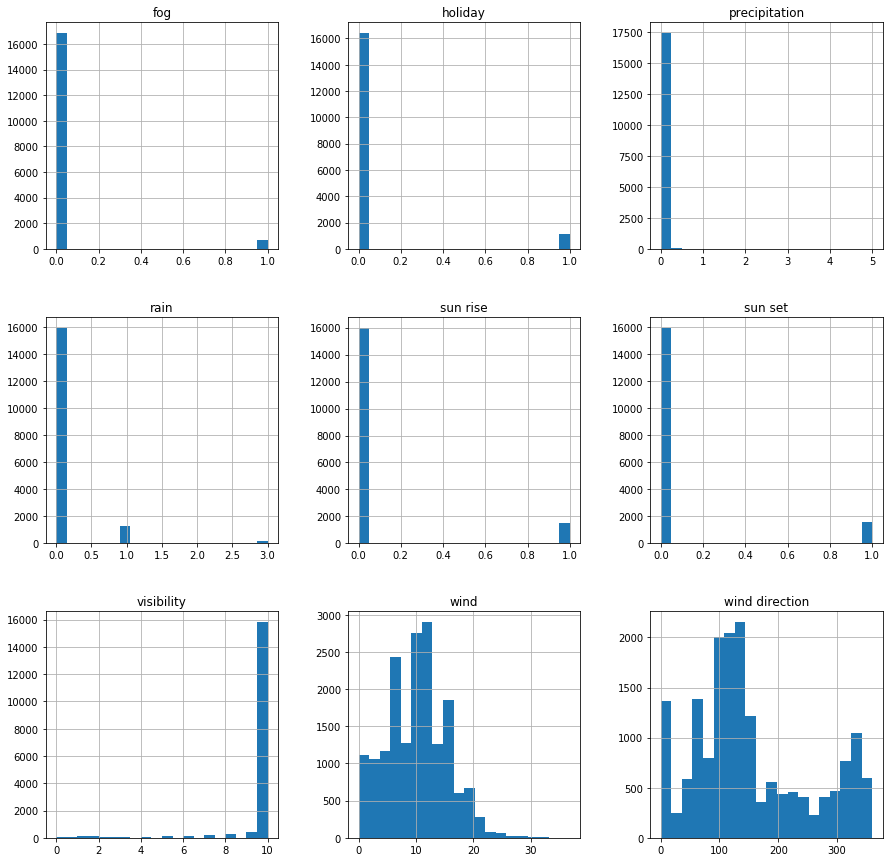

In [11]:
#各属性值的分布 ['holiday', 'precipitation', 'visibility', 'wind', 'wind direction', 'fog', 'rain', 'sun rise', 'sun set']
acc.hist(bins=20, figsize=(15,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d7184bdd8>,
      dtype=object)

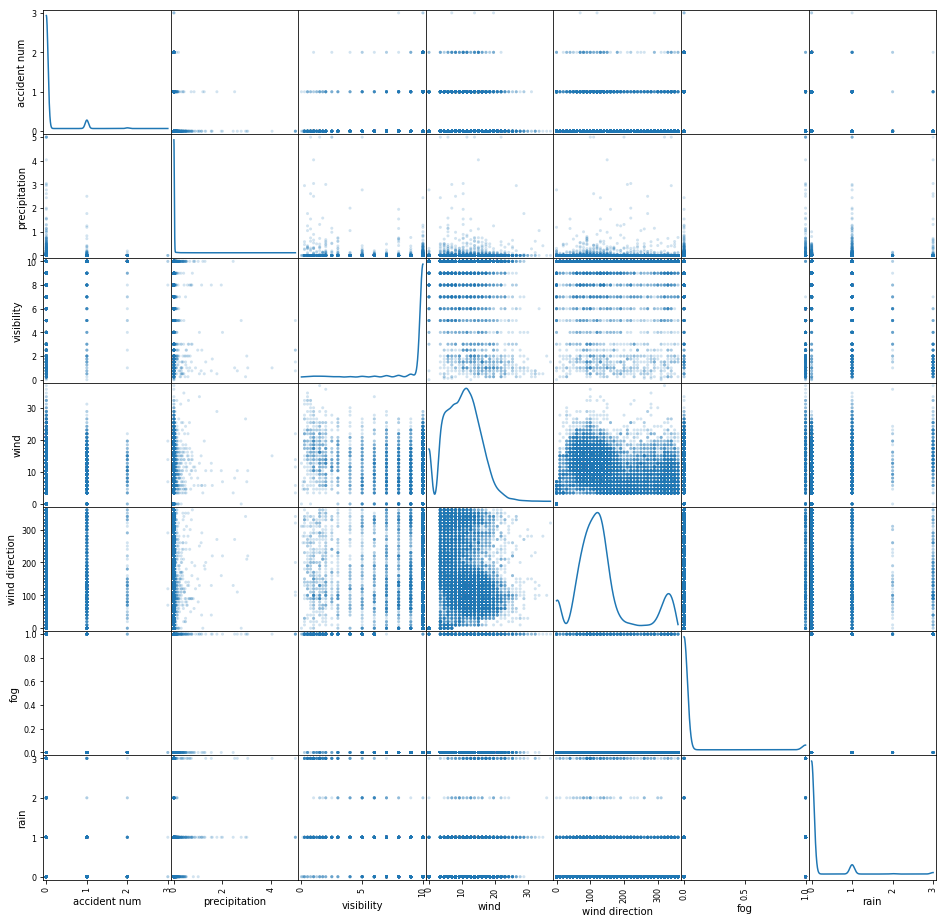

In [12]:
#['Time', 'accident type', 'holiday', 'precipitation', 'visibility', 'wind', 'wind direction', 'fog', 'rain', 'sun rise', 'sun set'
from pandas.plotting import scatter_matrix

scatter_attributes = [ 'accident num','precipitation', 'visibility', 'wind', 'wind direction', 'fog', 'rain']
scatter_matrix(acc_all[scatter_attributes], alpha=0.2, figsize=(16, 16), diagonal='kde')

暂时只能看出wind和wind direction有较强关联性，各个属性同accident_num没有明显强关联性。计算一下各个属性的相关性系数看看

In [13]:
corr_attributes = ['accident num', 'precipitation', 'visibility', 'wind', 'wind direction', 'fog', 'rain','sun rise', 'sun set']
acc_corr = acc_all[corr_attributes]
corr_matrix = acc_all.corr()
corr_matrix['accident num'].sort_values(ascending=False)

accident num      1.000000
wind              0.043940
rain              0.014107
fog               0.006532
precipitation     0.003703
sun set           0.001778
wind direction   -0.000414
visibility       -0.009250
holiday          -0.012781
sun rise         -0.023082
Name: accident num, dtype: float64

总体看起来风、雨、雾相关系数最大。风向、日出日落、假期、可视度（常理可视度影响应该会比较大）系数没有明显关联。

## 预处理

### 缺失值补齐

从'acc.info()'结果看来数据没有缺失

### 属性合并

暂无

### 分类值转数值

Time, accident type两个属性需要处理

In [14]:
acc.head()

,Time,accident type,holiday,precipitation,visibility,wind,wind direction,fog,rain,sun rise,sun set
0,1/1/2011 0:00,A1,1,0.0,10.0,16.11,130,0,0,0,0
1,1/1/2011 2:00,NONE,1,0.0,10.0,10.36,130,0,0,0,0
2,1/1/2011 4:00,NONE,1,0.0,10.0,13.80,130,0,0,0,0
3,1/1/2011 6:00,NONE,1,0.0,10.0,16.11,130,0,0,1,0
4,1/1/2011 8:00,NONE,1,0.0,10.0,16.11,140,0,0,0,0


In [15]:
print(acc['Time'].head())
print(acc['Time'].tail())

0    1/1/2011 0:00
1    1/1/2011 2:00
2    1/1/2011 4:00
3    1/1/2011 6:00
4    1/1/2011 8:00
Name: Time, dtype: object
17527    14:00 31/12/2014
17528    16:00 31/12/2014
17529    18:00 31/12/2014
17530    20:00 31/12/2014
17531    22:00 31/12/2014
Name: Time, dtype: object


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime, date, time

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        return x[self.attribute_names].values

class LabelBinarizerPipelineFriendly(LabelBinarizer):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelBinarizerPipelineFriendly, self).fit(X)
    def transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).transform(X)
    def fit_transform(self, X, y=None):
        print("debug:fit_transform len(x)=%d"%(len(X)))
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)

class TimeAttribsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,time_from='01/01/2011 00:00'):
        self.from_dt = datetime.strptime(time_from, "%d/%m/%Y %H:%M")
    def fit(self,x, y=None):
        return self
    def __do_transform__(self, timeStr):
        #return timeStr
        day_time_splits = timeStr.split(' ')
        dt_format = "%d/%m/%Y %H:%M" if len(day_time_splits[0]) > len(day_time_splits[1]) else "%H:%M %d/%m/%Y"
        dt = datetime.strptime(timeStr, dt_format)
        dt_delta = dt-self.from_dt
        hours = dt_delta.days*24+dt_delta.seconds/3600
        return hours
    def transform(self,x,y=None):
        # hours from 2000/1/1 0:00
        time_sequence = np.array([self.__do_transform__(str(val[0])) for val in x])
        return np.c_[time_sequence]    

In [17]:
from sklearn.pipeline import Pipeline

# 时间类数据处理
time_pipeline = Pipeline([
    # 数据选择
    ('selector', DataFrameSelector(time_attributes)),
     # 数据选择
    ('time_transformer', TimeAttribsTransformer())
])

# 分类型数据处理num_attributes
cat_pipeline = Pipeline([    
    # 数据选择
    ('selector', DataFrameSelector(cat_attributes)),
    # 分类值独热编码
    ('label_binarizer', LabelBinarizerPipelineFriendly())
])

num_pipeline = Pipeline([
    # 数据选择
    ('selector', DataFrameSelector(num_attributes)),
    # 标准化：标准差标准化
    ('scaler', StandardScaler())
])

# pipeline集合
full_pipelines = FeatureUnion([
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
    ('time_pipeline',time_pipeline)
])


In [18]:
time_prepared = time_pipeline.fit_transform(acc[0:16])
print(time_prepared)

[[ 0.]
 [ 2.]
 [ 4.]
 [ 6.]
 [ 8.]
 [10.]
 [12.]
 [14.]
 [16.]
 [18.]
 [20.]
 [22.]
 [24.]
 [26.]
 [28.]
 [30.]]


In [19]:
acc_prepared = full_pipelines.fit_transform(acc)

debug:fit_transform len(x)=17532


In [20]:
acc_prepared.shape

(17532, 11)

In [21]:
acc_prepared[10:14]

array([[ 3.81346997, -0.06465394,  0.2651457 ,  0.49370108, -0.21958904,
        -0.20362638, -0.27402253, -0.30910287, -0.31427953,  1.        ,
        20.        ],
       [ 3.81346997, -0.06465394,  0.2651457 ,  0.49370108, -0.21958904,
        -0.20362638, -0.27402253, -0.30910287, -0.31427953,  1.        ,
        22.        ],
       [-0.26222837, -0.06465394,  0.2651457 , -0.16112904, -0.32031364,
        -0.20362638, -0.27402253, -0.30910287, -0.31427953,  1.        ,
        24.        ],
       [-0.26222837, -0.06465394,  0.2651457 ,  0.05587862, -0.11886445,
        -0.20362638, -0.27402253, -0.30910287, -0.31427953,  1.        ,
        26.        ]])

### 建立模型

#### Linear Reggression

In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

def acc_predict(model, dataset, labels):
    label_values = labels.values
    predict = model.predict(dataset)
    predict_num = np.array([int(x) for x in predict])
    print( "precision:", precision_score(label_values, predict_num, average='weighted') )
    print( "recall:", recall_score(label_values, predict_num, average='weighted') )
    print( "f1:", f1_score(label_values, predict_num, average='weighted') )
    print( "fbeta 0.5:", fbeta_score(label_values, predict_num, beta=0.5, average='weighted') )
    print( "fbeta 1.0:", fbeta_score(label_values, predict_num, beta=1, average='weighted') )
    #在预测数据中存在实际类别没有的标签时报UndefinedMetricWarning

In [41]:
from sklearn.linear_model import LinearRegression

data_len = acc_prepared.shape[0]
train_idx = int(data_len/2)
print(train_idx)
linear_reg = LinearRegression()
linear_reg.fit(acc_prepared[:train_idx,], acc_labels[:train_idx,])

8766


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
acc_predict(linear_reg, acc_prepared[train_idx:,], acc_labels[train_idx:,])

precision: 0.9817414950885177
recall: 0.9904175222450377
f1: 0.9858641462905521
fbeta 0.5: 0.9833428554727789
fbeta 1.0: 0.9858641462905521


### 评估
按照预测模型，计算预测值，分类，计算准确率、召回率、正召回（预测有事故实际有事故），负召回1（无事故但报道有事故），负召回2（有事故没有预测有事故）

In [24]:
from sklearn.model_selection import cross_val_score

# Accuracy is a classification metric. You can't use it with a regression. See the documentation for info on the various metrics.
# cv_scores = cross_val_score(linear_reg, acc_prepared, acc_labels, scoring='precision_weighted',cv=8)

In [25]:
from sklearn.linear_model.stochastic_gradient import SGDClassifier

import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

def cv_scores(model, dataset, labels):
    recall_score = cross_val_score(model, dataset, labels, scoring='recall_weighted',cv=8)
    print(recall_score)
    
    precision_score = cross_val_score(model, dataset, labels, scoring='precision_weighted',cv=8)
    print(precision_score)
    

clf_linear = SGDClassifier(max_iter=100)
clf_linear.fit(acc_prepared, acc_labels)
cv_scores(clf_linear, acc_prepared, acc_labels)

/usr/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)


[0.92433911 0.92433911 0.9247606  0.92514833 0.92557078 0.92557078
 0.92557078 0.92557078]


/usr/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)


[0.85440278 0.85440278 0.85518217 0.85589944 0.85668126 0.85668126
 0.85668126 0.85668126]


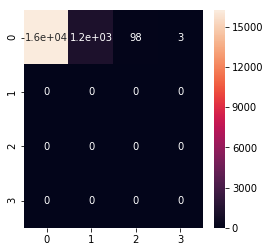

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

clf_linear_predict = clf_linear.predict(acc_prepared)
con_array = confusion_matrix(clf_linear_predict, acc_labels)
df_cm = pd.DataFrame(con_array, index = [i for i in "0123"],
                     columns = [i for i in "0123"])
plt.figure(figsize = (4,4))
sn.heatmap(df_cm, annot=True)

#### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=4, random_state=0)
clf_rf.fit(acc_prepared, acc_labels)
cv_scores(clf_rf, acc_prepared, acc_labels)

/usr/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)


[0.99361896 0.99361896 0.99407205 0.99452305 0.99452055 0.99452055
 0.99452055 0.94931507]


/usr/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)


[0.98777608 0.98777608 0.98861115 0.98944685 0.98944449 0.98944449
 0.98944449 0.99050402]


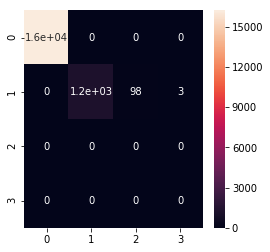

In [28]:
clf_rf_predict = clf_rf.predict(acc_prepared)
con_array = confusion_matrix(clf_rf_predict, acc_labels)
df_cm = pd.DataFrame(con_array, index = [i for i in "0123"],
                     columns = [i for i in "0123"])
plt.figure(figsize = (4,4))
sn.heatmap(df_cm, annot=True)